In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data_df = pd.read_csv('data.csv')

In [4]:
data_df["date"] = pd.to_datetime(data_df["date"], format="%Y-%m-%d")

In [8]:
data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64675 entries, 0 to 64674
Data columns (total 138 columns):
 #    Column                                           Dtype         
---   ------                                           -----         
 0    iso_code                                         object        
 1    country                                          object        
 2    date                                             datetime64[ns]
 3    jhu_confirmed                                    float64       
 4    jhu_deaths                                       float64       
 5    jhu_recovered                                    float64       
 6    owid_total_cases                                 float64       
 7    owid_new_cases                                   float64       
 8    owid_total_deaths                                float64       
 9    owid_new_deaths                                  float64       
 10   owid_total_cases_per_million                

56.756769372736386


(array([3104., 2730., 1950., 3826., 4234., 5379., 6005., 7483., 6779.,
        2941.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

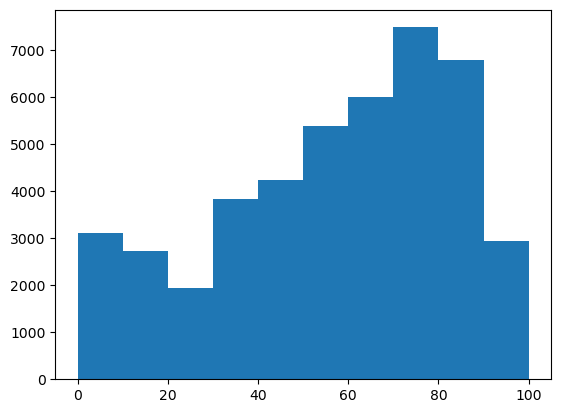

In [11]:
print(data_df.owid_stringency_index.mean())
plt.hist(data_df.owid_stringency_index)

363.89588323867605


(array([49007.,   530.,     0.,    58.,   305.,     0.,     0.,     0.,
            0.,   305.]),
 array([1.37000000e-01, 1.93487330e+03, 3.86960960e+03, 5.80434590e+03,
        7.73908220e+03, 9.67381850e+03, 1.16085548e+04, 1.35432911e+04,
        1.54780274e+04, 1.74127637e+04, 1.93475000e+04]),
 <BarContainer object of 10 artists>)

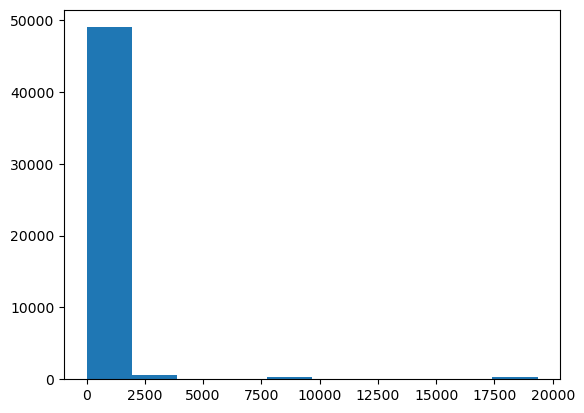

In [25]:
print(data_df.owid_population_density.mean())
plt.hist(data_df.owid_population_density)

49311866.45357971


/var/folders/7j/zs8rg5b55zzfgwqhb9y26nsw0000gn/T/ipykernel_96238/1720192943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_slice.dropna(inplace=True)


(array([41795.,  1730.,   299.,     0.,     0.,     0.,     0.,     0.,
            0.,   607.]),
 array([3.48300000e+03, 1.43935512e+08, 2.87867541e+08, 4.31799570e+08,
        5.75731599e+08, 7.19663628e+08, 8.63595658e+08, 1.00752769e+09,
        1.15145972e+09, 1.29539174e+09, 1.43932377e+09]),
 <BarContainer object of 10 artists>)

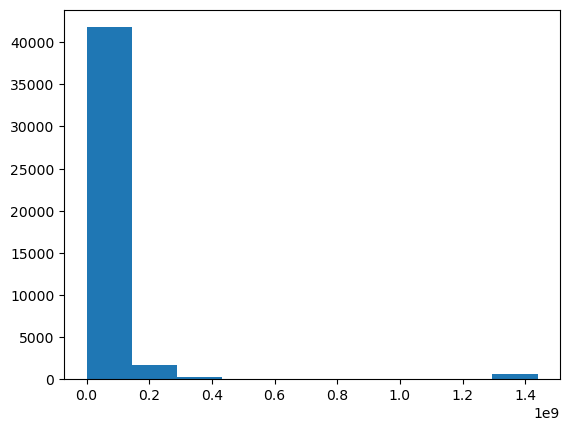

In [18]:
# Is there a difference in the stringency index based on population?
population_slice = data_df[['country','owid_population','owid_stringency_index']]
population_slice.dropna(inplace=True)
print(population_slice.owid_population.mean())
plt.hist(population_slice.owid_population)

(array([5980., 1188.,  299.,    0.,    0.,    0.,    0.,    0.,    0.,
         607.]),
 array([5.08828840e+07, 1.89726973e+08, 3.28571062e+08, 4.67415151e+08,
        6.06259240e+08, 7.45103329e+08, 8.83947418e+08, 1.02279151e+09,
        1.16163560e+09, 1.30047968e+09, 1.43932377e+09]),
 <BarContainer object of 10 artists>)

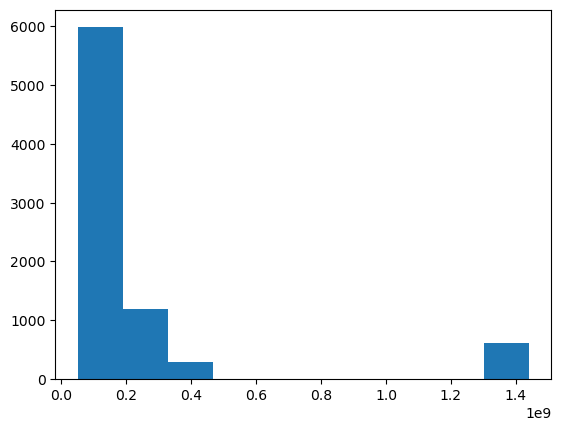

In [20]:
# Separate the countries by low population and high population
low_pop_slice = population_slice[population_slice.owid_population < 49311866]
hi_pop_slice = population_slice[population_slice.owid_population >= 49311866]
plt.hist(hi_pop_slice.owid_population)


In [22]:
print(low_pop_slice.describe())
print(hi_pop_slice.describe())

       owid_population  owid_stringency_index
count     3.635700e+04           36357.000000
mean      1.204694e+07              56.884189
std       1.241974e+07              26.306648
min       3.483000e+03               0.000000
25%       2.722291e+06              38.890000
50%       7.275556e+06              60.190000
75%       1.764306e+07              78.700000
max       4.675478e+07             100.000000
       owid_population  owid_stringency_index
count     8.074000e+03            8074.000000
mean      2.171148e+08              56.183001
std       3.473544e+08              27.300240
min       5.088288e+07               0.000000
25%       6.527351e+07              41.200000
50%       1.023344e+08              63.890000
75%       2.061396e+08              78.240000
max       1.439324e+09             100.000000


In [24]:
# Separate the stringency into two arrays to be evaluated in a t-test
S1 = pd.to_numeric(low_pop_slice.owid_stringency_index,errors='coerce').values
S2 = pd.to_numeric(hi_pop_slice.owid_stringency_index,errors='coerce').values
combinedData = np.transpose(np.array([S1, S2]))
t1,p1 = stats.ttest_ind(combinedData[0],combinedData[1])
print(t1, p1)

2.1515364082281354 0.031439258259659694


/var/folders/7j/zs8rg5b55zzfgwqhb9y26nsw0000gn/T/ipykernel_96238/3962349473.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  combinedData = np.transpose(np.array([S1, S2]))


233.46982996176612


/var/folders/7j/zs8rg5b55zzfgwqhb9y26nsw0000gn/T/ipykernel_96238/540087578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_density_slice.dropna(inplace=True)


(array([41870.,   463.,   303.,     0.,   166.,     0.,     0.,     0.,
           58.,   295.]),
 array([1.3700000e-01, 7.9169640e+02, 1.5832558e+03, 2.3748152e+03,
        3.1663746e+03, 3.9579340e+03, 4.7494934e+03, 5.5410528e+03,
        6.3326122e+03, 7.1241716e+03, 7.9157310e+03]),
 <BarContainer object of 10 artists>)

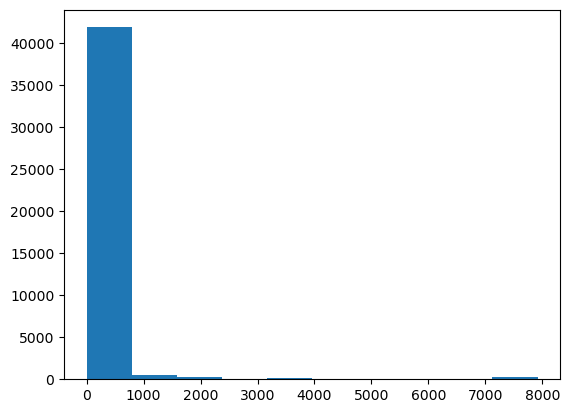

In [28]:
# Is there a difference in the stringency index based on population density?
population_density_slice = data_df[['country','owid_population_density','owid_stringency_index']]
population_density_slice.dropna(inplace=True)
population_density_slice = population_density_slice[population_density_slice.owid_population_density > 0]
print(population_density_slice.owid_population_density.mean())
plt.hist(population_density_slice.owid_population_density)

20812.59685682517


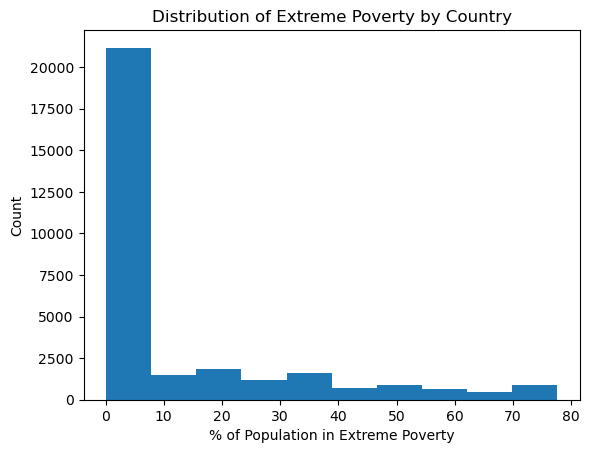

In [65]:
# Is there a difference in the stringency index based on population density?

gdp_slice = data_df[['country','owid_gdp_per_capita','owid_stringency_index', 'owid_new_cases_per_million',
                    'owid_new_deaths_per_million', 'owid_hospital_beds_per_thousand', 'owid_handwashing_facilities',
                    'ox_government_response_index', 'yougov_finances_fears', 'sdsn_overall_transmission', 
                     'owid_extreme_poverty' ]]
#gdp_slice.dropna(inplace=True)
print(gdp_slice.owid_gdp_per_capita.mean())
#plt.hist(gdp_slice.owid_gdp_per_capita)
#plt.hist(gdp_slice.ox_government_response_index)
#plt.hist(gdp_slice.sdsn_overall_transmission)
plt.hist(gdp_slice.owid_extreme_poverty)
plt.title('Distribution of Extreme Poverty by Country')
plt.xlabel('% of Population in Extreme Poverty')
plt.ylabel('Count')
plt.savefig('Distribution of Extreme Poverty All Country Counts.png')

(array([1706.,    0., 1346.,    0.,    0.,  643.,    0.,  122.,    0.,
          76.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

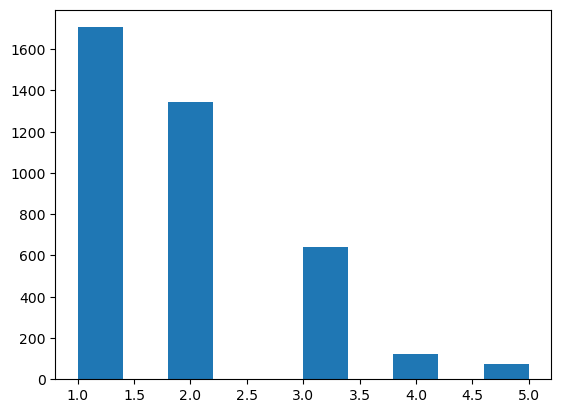

In [36]:
# Separate by less than 10% extreme poverty and more than 10% extreme poverty, look at transmission index
low_extreme_poverty_df = gdp_slice[gdp_slice.owid_extreme_poverty <= 10]
hi_extreme_poverty_df = gdp_slice[gdp_slice.owid_extreme_poverty > 10]
plt.hist(hi_extreme_poverty_df.sdsn_overall_transmission)

(array([3855.,    0., 1645.,    0.,    0., 3908.,    0., 1507.,    0.,
        2219.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

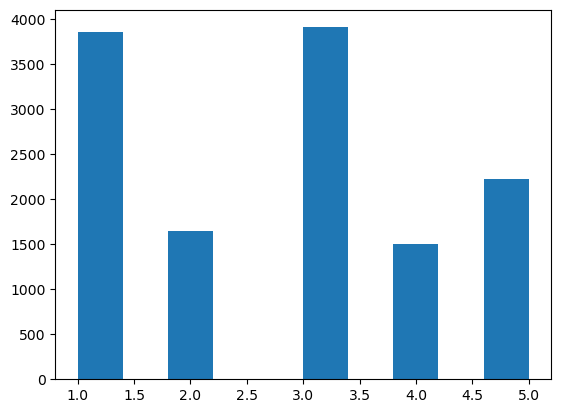

In [47]:
plt.hist(low_extreme_poverty_df.sdsn_overall_transmission)

In [56]:
low_poverty_transmissison = pd.to_numeric(low_extreme_poverty_df['sdsn_overall_transmission'],errors='coerce').values
low_poverty_transmissison = low_poverty_transmissison[np.isfinite(low_poverty_transmissison)]

In [57]:
hi_poverty_transmissison = pd.to_numeric(hi_extreme_poverty_df['sdsn_overall_transmission'],errors='coerce').values
hi_poverty_transmissison = hi_poverty_transmissison[np.isfinite(hi_poverty_transmissison)]

In [72]:
len(hi_poverty_transmissison)

3893

In [58]:
d1,p1 = stats.kstest(low_poverty_transmissison, hi_poverty_transmissison)
print(d1,p1)

0.36521076140183745 0.0


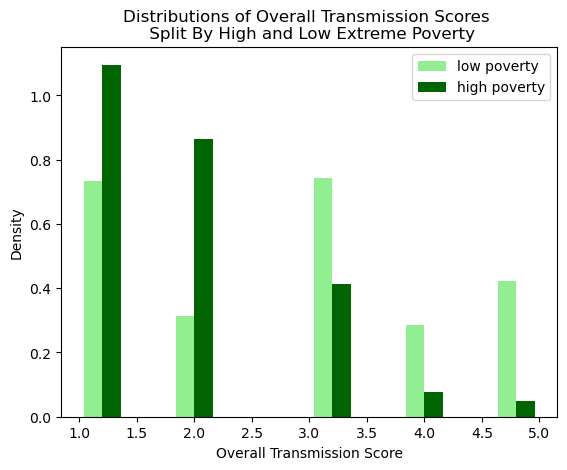

In [70]:
# Plot the ratings of new and old
title = 'Distributions of Overall Transmission Scores \n Split By High and Low Extreme Poverty'
plt.hist([low_poverty_transmissison, hi_poverty_transmissison], color=['lightgreen','darkgreen'], 
         label = ['low poverty', 'high poverty'], density = True)
plt.xlabel("Overall Transmission Score")
plt.ylabel("Density")
plt.title(title)
plt.legend(loc="upper right")
plt.savefig('Distributions of Overall Transmission Rate.png')

In [38]:
low_extreme_poverty_df.describe()

,owid_gdp_per_capita,owid_stringency_index,owid_new_cases_per_million,owid_new_deaths_per_million,owid_hospital_beds_per_thousand,owid_handwashing_facilities,ox_government_response_index,yougov_finances_fears,sdsn_overall_transmission,owid_extreme_poverty
count,21422.000000,19965.000000,21096.000000,21096.000000,20954.000000,7049.000000,19940.000000,120.000000,13134.000000,21422.00000
mean,22981.963347,55.968372,37.578348,0.923599,3.504424,77.386097,54.648339,60.241667,2.740369,1.63348
std,17150.749027,27.820311,86.002180,3.090138,2.227558,18.827722,23.691077,18.559011,1.422177,1.85336
min,2896.913000,0.000000,-2212.545000,-67.901000,0.600000,15.950000,0.000000,23.000000,1.000000,0.10000
25%,10581.936000,37.960000,0.100000,0.000000,1.710000,71.180000,45.240000,47.000000,1.000000,0.20000
50%,17336.469000,62.040000,6.101500,0.050000,2.910000,83.741000,61.900000,56.500000,3.000000,1.00000
75%,30155.152000,78.240000,40.940000,0.914000,4.510000,89.827000,70.830000,77.250000,4.000000,2.00000
max,94277.965000,100.000000,1892.582000,215.382000,12.270000,98.999000,91.070000,91.000000,5.000000,8.70000


In [39]:
hi_extreme_poverty_df.describe()

,owid_gdp_per_capita,owid_stringency_index,owid_new_cases_per_million,owid_new_deaths_per_million,owid_hospital_beds_per_thousand,owid_handwashing_facilities,ox_government_response_index,yougov_finances_fears,sdsn_overall_transmission,owid_extreme_poverty
count,9395.000000,8592.000000,9302.000000,9302.000000,7172.000000,9169.000000,8574.000000,8.00000,3893.000000,9395.000000
mean,3015.738128,59.601703,7.386681,0.138724,1.132402,25.610943,55.846346,72.12500,1.848189,37.080947
std,2451.529429,23.534693,24.047823,0.513038,1.072598,19.792931,18.520086,2.10017,0.938948,19.133482
min,702.225000,0.000000,-17.240000,0.000000,0.200000,1.188000,0.000000,70.00000,1.000000,10.100000
25%,1479.147000,43.520000,0.000000,0.000000,0.500000,8.704000,45.830000,70.00000,1.000000,21.200000
50%,2064.236000,62.040000,0.598000,0.000000,0.800000,19.351000,58.780000,72.00000,2.000000,36.800000
75%,3601.006000,78.700000,4.444500,0.060000,1.400000,43.993000,69.050000,74.00000,2.000000,49.600000
max,12294.876000,100.000000,711.805000,9.644000,5.900000,84.169000,95.540000,75.00000,5.000000,77.600000


(array([4009.,    0., 2418.,    0.,    0., 2538.,    0.,  872.,    0.,
        1510.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

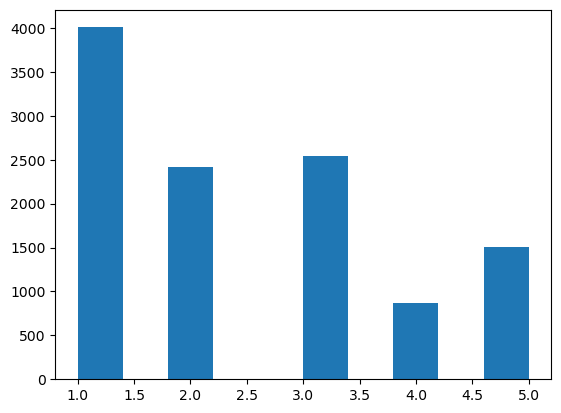

In [43]:
# Separate by gdp per capita
low_gdp_df = gdp_slice[gdp_slice.owid_gdp_per_capita <= 20812]
hi_gdp_df = gdp_slice[gdp_slice.owid_gdp_per_capita > 20812]
plt.hist(low_gdp_df.sdsn_overall_transmission)

In [44]:
low_gdp_df.describe()

,owid_gdp_per_capita,owid_stringency_index,owid_new_cases_per_million,owid_new_deaths_per_million,owid_hospital_beds_per_thousand,owid_handwashing_facilities,ox_government_response_index,yougov_finances_fears,sdsn_overall_transmission,owid_extreme_poverty
count,28972.000000,26026.000000,28547.000000,28547.000000,25086.000000,20493.000000,26002.000000,56.000000,11347.000000,21392.000000
mean,8091.144999,61.143634,20.534513,0.472508,2.271753,50.685164,56.507383,75.910714,2.423284,17.583559
std,5640.967032,25.996898,52.474812,2.332183,1.998657,31.289166,20.894985,11.040877,1.379510,21.467556
min,661.240000,0.000000,-468.229000,-67.901000,0.100000,1.188000,0.000000,50.000000,1.000000,0.100000
25%,2851.153000,45.370000,0.000000,0.000000,0.800000,20.859000,47.620000,72.000000,1.000000,1.400000
50%,7423.808000,67.590000,1.430000,0.000000,1.600000,49.839000,61.900000,78.000000,2.000000,5.000000
75%,13111.214000,80.560000,14.386500,0.226000,2.900000,80.635000,70.830000,83.000000,3.000000,30.300000
max,20551.409000,100.000000,1763.437000,215.382000,11.000000,97.719000,95.540000,91.000000,5.000000,77.600000


In [46]:
hi_gdp_df.describe()

,owid_gdp_per_capita,owid_stringency_index,owid_new_cases_per_million,owid_new_deaths_per_million,owid_hospital_beds_per_thousand,owid_handwashing_facilities,ox_government_response_index,yougov_finances_fears,sdsn_overall_transmission,owid_extreme_poverty
count,17517.000000,15711.000000,17303.000000,17303.000000,16328.000000,999.000000,15582.000000,137.000000,11588.000000,9425.000000
mean,41853.066299,50.349218,48.950744,0.857423,4.202867,79.171916,51.991302,55.204380,2.919917,0.766090
std,18628.330792,26.660337,118.060614,3.332699,2.439905,30.046311,23.949003,15.452079,1.413777,1.038835
min,21490.943000,0.000000,-2212.545000,-41.023000,1.200000,24.640000,0.000000,23.000000,1.000000,0.100000
25%,27936.896000,33.330000,0.000000,0.000000,2.540000,89.443000,41.670000,45.000000,2.000000,0.200000
50%,36513.323000,52.780000,8.177000,0.000000,3.320000,97.400000,58.630000,56.000000,3.000000,0.500000
75%,46949.283000,72.690000,45.374500,0.576000,5.570000,97.400000,69.640000,66.000000,4.000000,0.700000
max,116935.600000,100.000000,2209.912000,176.793000,13.050000,98.999000,92.260000,85.000000,5.000000,5.700000


In [10]:
# Pulling a country list: 218 countries
countries = list(data_df['country'])
countries = set(countries)
countries

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands',
 'Faroe Islands',
 'Fiji',
 

(array([55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 74.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

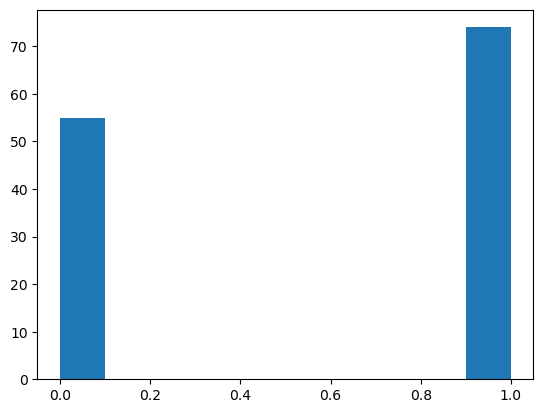

In [18]:
aruba_df = data_df[data_df['country'] == 'Aruba']
plt.hist(aruba_df['ox_c4_flag'])

(array([19856.,  1061.,  4805.,  3412.,     0.,  7686.,  4601.,  6786.,
         2982.,  2465.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

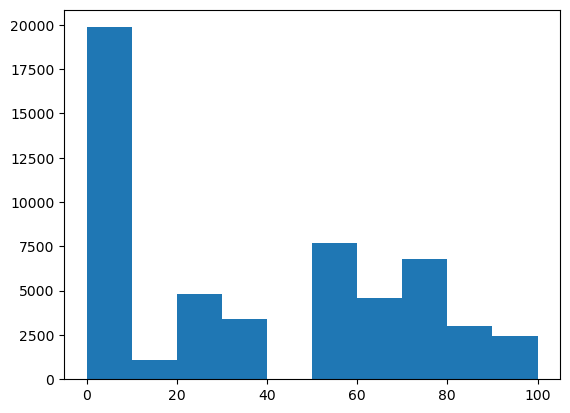

In [25]:
US_df = data_df[data_df['country'] == 'United States']
plt.hist(data_df['ox_economic_support_index'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (305,) and arg 1 with shape (64675,).

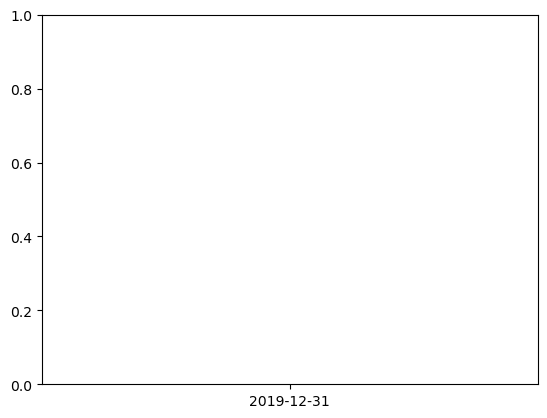

In [32]:
x = US_df['date']
y = data_df['ox_economic_support_index']
ax = plt.subplot()
ax.bar(x,y )
plt.show()

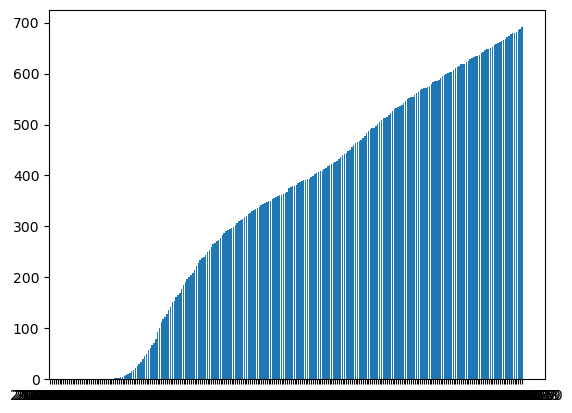

In [29]:
x = US_df['date']
y = US_df['owid_total_deaths_per_million']
ax = plt.subplot()
ax.bar(x,y)
#ax.xaxis_date()
plt.show()

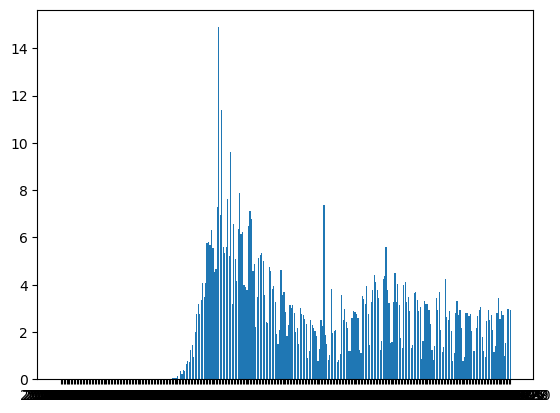

In [33]:
x = US_df['date']
y = US_df['owid_new_deaths_per_million']
ax = plt.subplot()
ax.bar(x,y)
#ax.xaxis_date()
plt.show()

In [20]:
for country in list(countries):
    country_df = data_df[data_df['country'] == country]
    restrictions = country_df['ox_e1_flag'].sum()
    if restrictions <1:
        print(country)

nan
Romania
Jersey
Georgia
Eritrea
Venezuela, RB
Northern Mariana Islands
United States
Wallis & Futuna
Sierra Leone
Malta
Comoros
Cambodia
Equatorial Guinea
Armenia
Zambia
United Arab Emirates
Tanzania
Suriname
Kazakhstan
Nigeria
Latvia
Sweden
Congo, Dem. Rep.
Russian Federation
Uzbekistan
Burkina Faso
Denmark
Isle of Man
Liberia
Bahamas, The
St. Vincent and the Grenadines
Algeria
Syrian Arab Republic
Faroe Islands
Réunion
Oman
Montenegro
Germany
Guinea-Bissau
Antigua and Barbuda
Indonesia
Saudi Arabia
Gabon
Caribbean Netherlands
Guyana
Ethiopia
Maldives
Monaco
Serbia
Bermuda
Ghana
North Macedonia
Liechtenstein
State of Palestine
Uganda
Austria
Turkmenistan
Bulgaria
China
Belarus
Bahrain
Switzerland
Turkey
Eswatini
Nicaragua
Ukraine
French Polynesia
British Virgin Islands
Botswana
Brunei Darussalam
Greenland
Guinea
Vanuatu
Qatar
Sao Tome and Principe
Vatican City
Lebanon
Burundi
Gambia, The
Marshall Islands
Hungary
Iran, Islamic Rep.
St. Kitts and Nevis
Bosnia and Herzegovina
Grenada
